In [1]:
import matplotlib.pyplot as plt             
from tabulate import tabulate               
import matplotlib as mat                    
import seaborn as sns                      
import pandas as pd                         
import numpy as np      

In [2]:
df = pd.read_csv("DS1_C6_S2_EmployeeAttrition_Data_Concept.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2


In [107]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Years Since Last Promotion', 'Years With Current Manager', 'Age_group',
       'Distance From Home', 'Monthly Income', 'Total Working Years',
       'Years At Company'],
      dtype='object')

In [4]:
df.shape



(1470, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1446 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1440 non-null   object 
 3   Department                1466 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   EducationField            1458 non-null   object 
 6   EmployeeNumber            1470 non-null   int64  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1425 non-null   object 
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobRole                   1460 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1414 non-null   object 
 14  MonthlyI

In [6]:
df.isnull().sum()

Age                         24
Attrition                    0
BusinessTravel              30
Department                   4
DistanceFromHome             0
EducationField              12
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                      45
HourlyRate                   0
JobInvolvement               0
JobRole                     10
JobSatisfaction              0
MaritalStatus               56
MonthlyIncome                0
NumCompaniesWorked           0
Over18                      54
OverTime                     0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: int64

In [7]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 20:       # nunique:  returns unique values in the column,
                                                    #here 30 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  -----------------
Attrition                 Age
BusinessTravel            DistanceFromHome
Department                EmployeeNumber
EducationField            HourlyRate
EnvironmentSatisfaction   MonthlyIncome
Gender                    TotalWorkingYears
JobInvolvement            YearsAtCompany
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
Over18
OverTime
PerformanceRating
RelationshipSatisfaction
TrainingTimesLastYear
WorkLifeBalance
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [8]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
      

In [9]:
info_of_cat("Attrition")

Unique values in Attrition are: ['Yes' 'No']
Mode of Attrition is No
Number of missing values in Attrition is 0


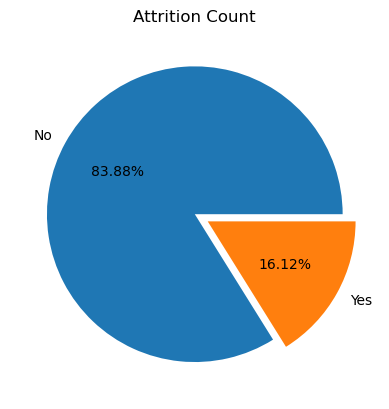

In [10]:
fig,figsize = (15, 7)
plt.title("Attrition Count")                  # Set the title of the graph
percentage = df["Attrition"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Attrition"].value_counts().index) # Converting the index of value counts into list
plt.pie(percentage,labels = labels, autopct= "%0.2f%%",explode= [0,0.1])  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

#### Interpretation:-The resulting pie chart shows the proportion of employees who left the company and those who stayed.The chart shows that a relatively small percentage of employees have left the company, but it's still important to understand why they left and how to prevent it from happening in the future.

In [11]:
info_of_cat("BusinessTravel")

Unique values in BusinessTravel are: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' nan]
Mode of BusinessTravel is Travel_Rarely
Number of missing values in BusinessTravel is 30


In [12]:
businesstravel_mode = df.BusinessTravel.mode()[0]
print(businesstravel_mode)
df["BusinessTravel"].fillna(businesstravel_mode, inplace = True)

Travel_Rarely


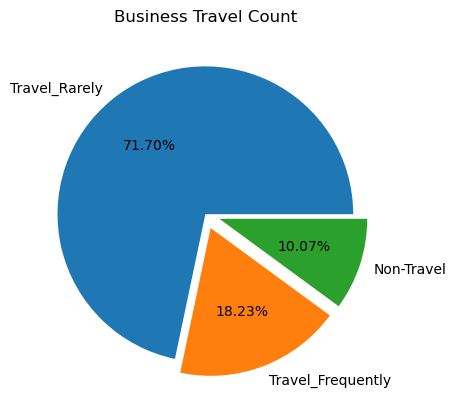

In [13]:
fig,figsize = (15, 7)
plt.title("Business Travel Count")                  # Set the title of the graph
percentage = df["BusinessTravel"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["BusinessTravel"].value_counts().index) # Converting the index of value counts into list
plt.pie(percentage,labels = labels, autopct= "%0.2f%%",explode= [0,0.1,0.1])  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

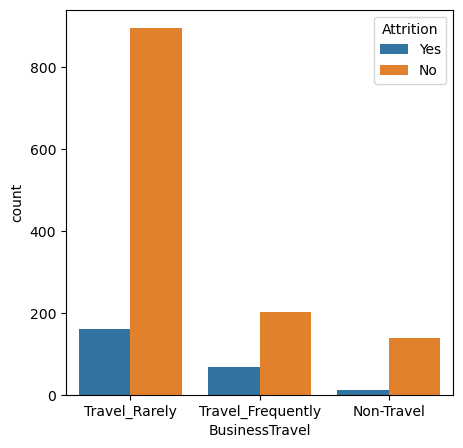

In [14]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = "BusinessTravel", hue = "Attrition", data = df)
plt.show()

In [15]:
info_of_cat("Department")

Unique values in Department are: ['Sales' 'Research & Development' 'Human Resources' nan]
Mode of Department is Research & Development
Number of missing values in Department is 4


In [16]:
Department_mode = df.Department.mode()[0]
print(Department_mode)
df["Department"].fillna(Department_mode, inplace = True)

Research & Development


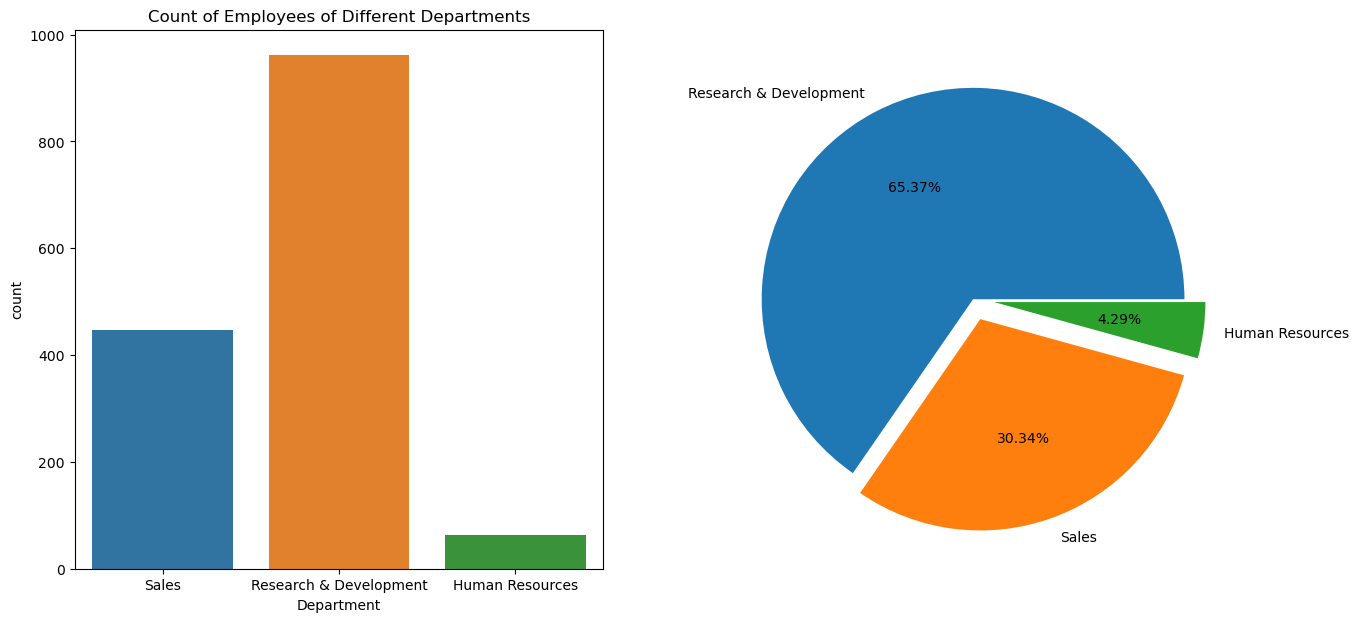

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Employees of Different Departments")                  # Set the title of the graph
percentage = df["Department"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Department"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Department"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%",explode= [0,0.1,0.1])  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

In [18]:
info_of_cat("EducationField")

Unique values in EducationField are: ['Life Sciences' 'Other' 'Medical' 'Marketing' nan 'Technical Degree'
 'Human Resources']
Mode of EducationField is Life Sciences
Number of missing values in EducationField is 12


In [19]:
EducationField_mode = df.EducationField.mode()[0]
print(EducationField_mode)
df["EducationField"].fillna(EducationField_mode, inplace = True)

Life Sciences


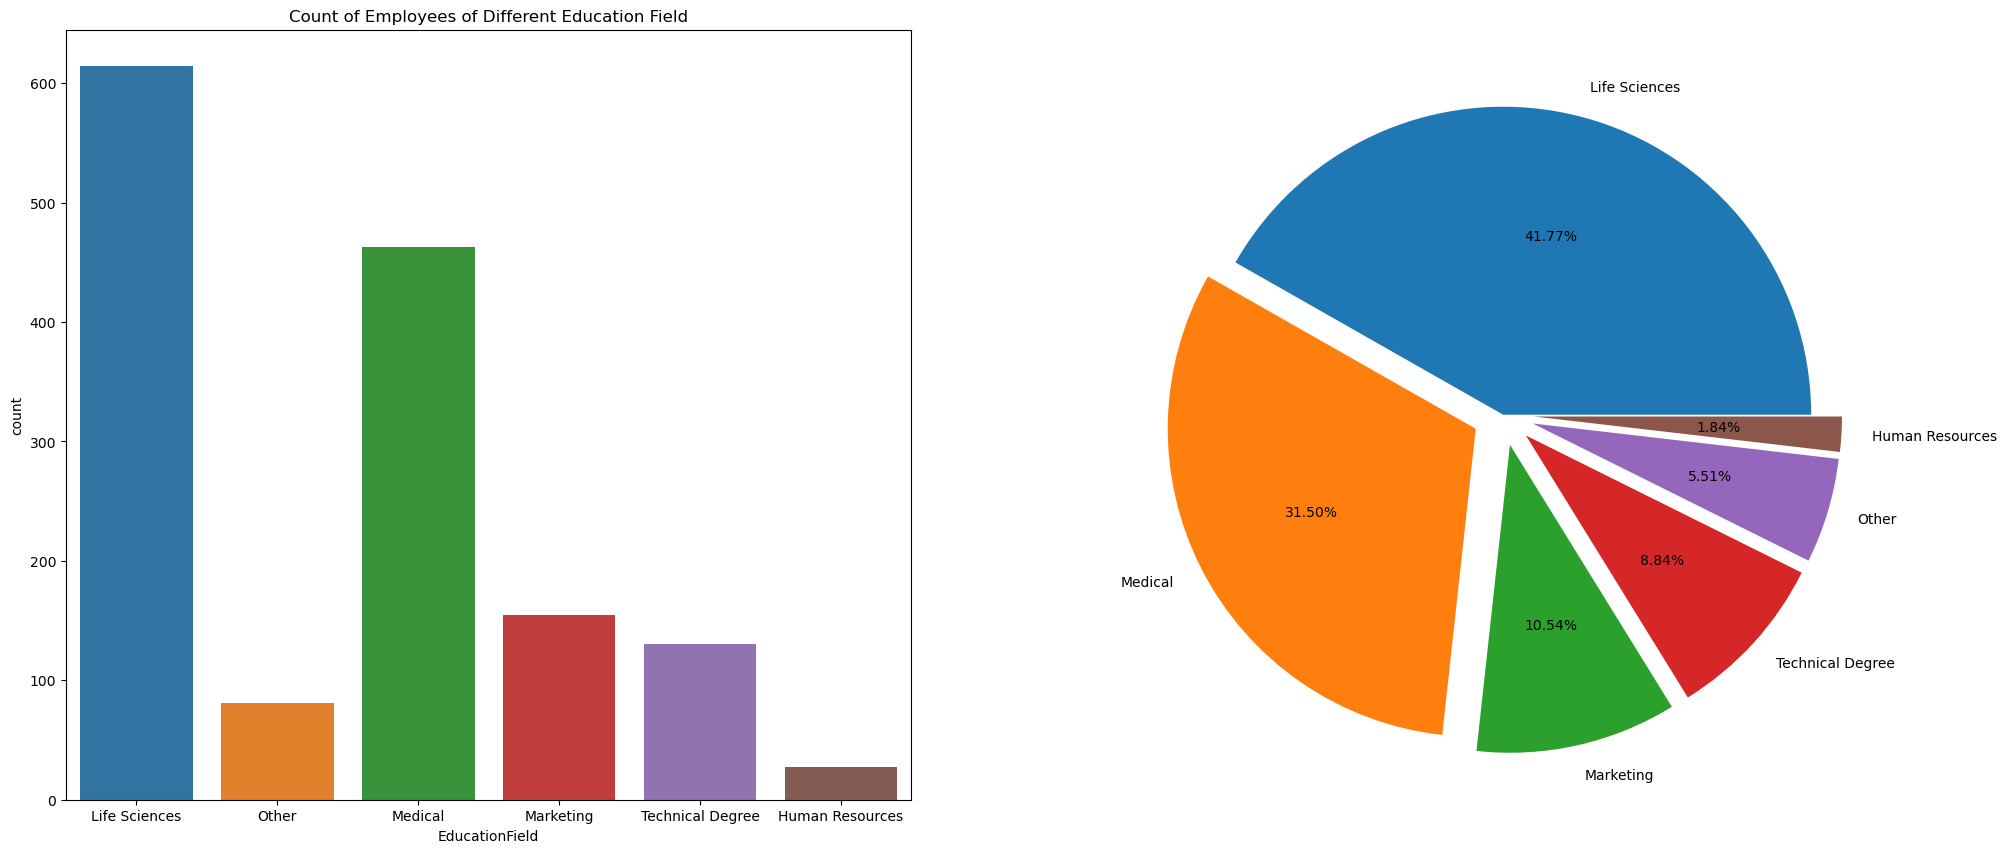

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (24,10))
ax[0].set_title("Count of Employees of Different Education Field")                  # Set the title of the graph
percentage = df["EducationField"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["EducationField"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["EducationField"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%",explode= [0,0.1,0.1,0.1,0.1,0.1])  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

In [21]:
info_of_cat("EnvironmentSatisfaction")

Unique values in EnvironmentSatisfaction are: [2 3 4 1]
Mode of EnvironmentSatisfaction is 3
Number of missing values in EnvironmentSatisfaction is 0


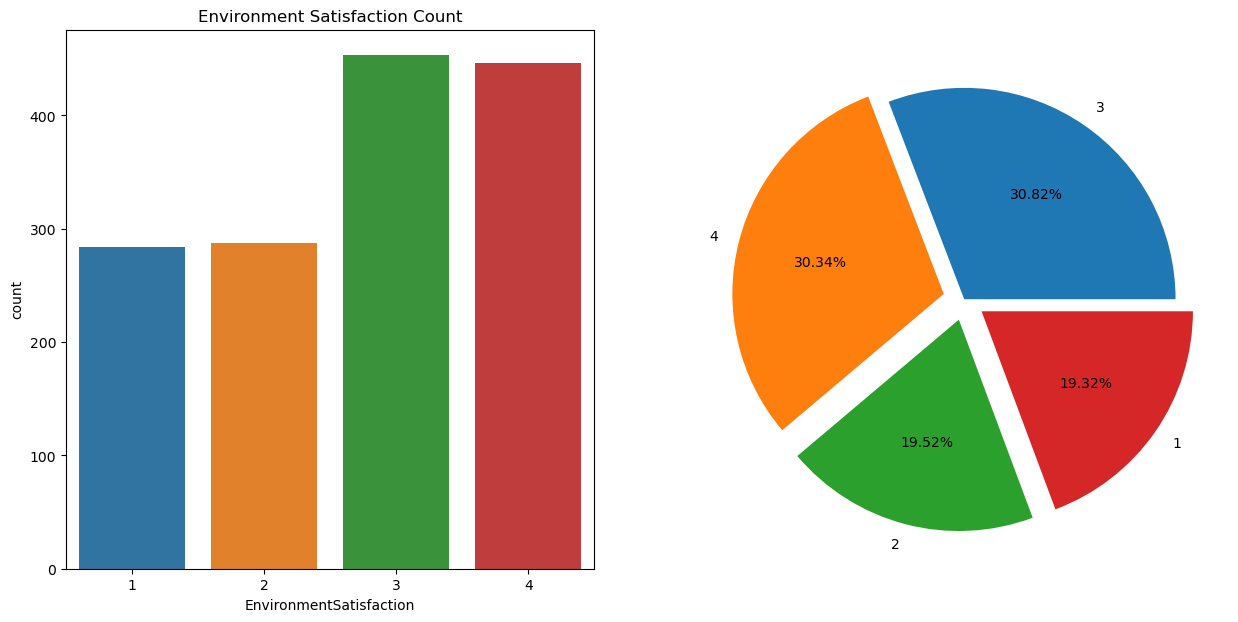

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (15,7))
ax[0].set_title("Environment Satisfaction Count")                  # Set the title of the graph
percentage = df["EnvironmentSatisfaction"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["EnvironmentSatisfaction"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["EnvironmentSatisfaction"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%",explode= [0,0.1,0.1,0.1])  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

In [23]:
info_of_cat("Gender")

Unique values in Gender are: ['Female' 'Male' nan]
Mode of Gender is Male
Number of missing values in Gender is 45


In [24]:
gender_mode = df.Gender.mode()[0]
print(gender_mode)
df["Gender"].fillna(gender_mode, inplace = True)

Male


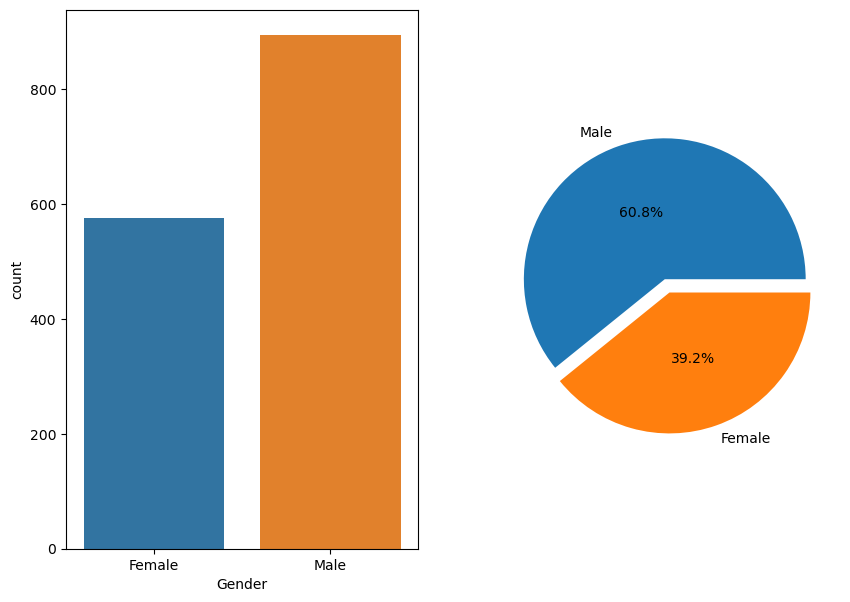

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (10, 7))
data = df["Gender"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = df["Gender"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", explode = [0, 0.1], labels = labels, pctdistance = 0.5) # pctdistance is the distance between the percentage
                                                                     # on pie chart from center.
                                                                     #  explode is to split the slices by the distance provided
                                                                     # autopct: is used to print the number on pie slices.  

plt.show()

In [26]:
info_of_cat("JobInvolvement")

Unique values in JobInvolvement are: [3 2 4 1]
Mode of JobInvolvement is 3
Number of missing values in JobInvolvement is 0


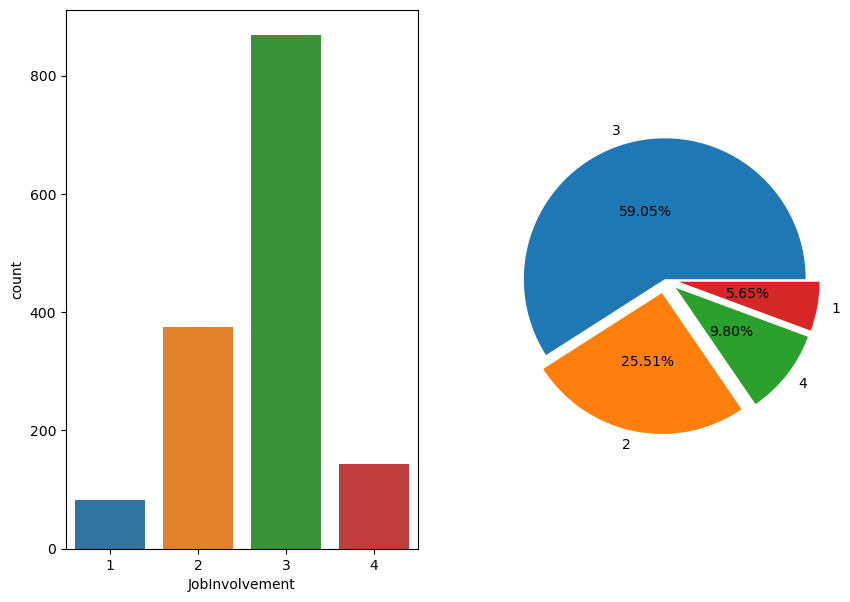

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (10, 7))
data = df["JobInvolvement"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = df["JobInvolvement"], ax = ax[0])
plt.pie(x = data, autopct = "%.2f%%", explode = [0, 0.1,0.1,0.1], labels = labels, pctdistance = 0.5) # pctdistance is the distance between the percentage
                                                                     # on pie chart from center.
                                                                     #  explode is to split the slices by the distance provided
                                                                     # autopct: is used to print the number on pie slices.  

plt.show()

In [28]:
info_of_cat("JobRole")

Unique values in JobRole are: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' nan 'Human Resources']
Mode of JobRole is Sales Executive
Number of missing values in JobRole is 10


In [29]:
JobRole_mode = df.JobRole.mode()[0]
print(JobRole_mode)
df["JobRole"].fillna(JobRole_mode, inplace = True)

Sales Executive


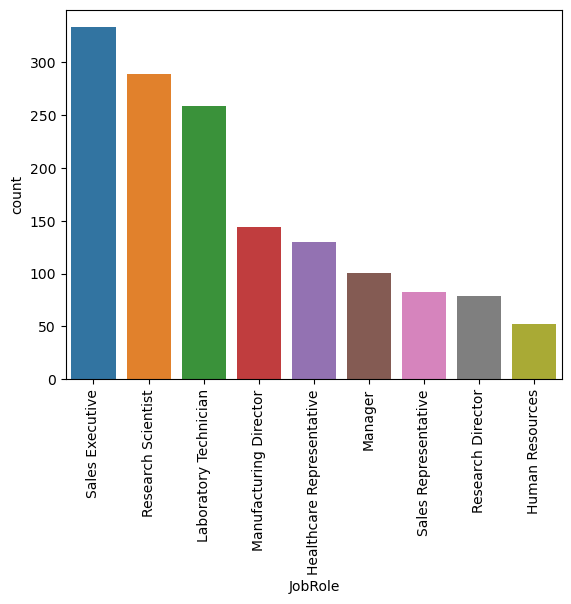

In [30]:
fig,figsize = (40, 10)
data = df["JobRole"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = df["JobRole"])
plt.xticks(rotation=90)
plt.show()

In [31]:
info_of_cat("JobSatisfaction")

Unique values in JobSatisfaction are: [4 2 3 1]
Mode of JobSatisfaction is 4
Number of missing values in JobSatisfaction is 0


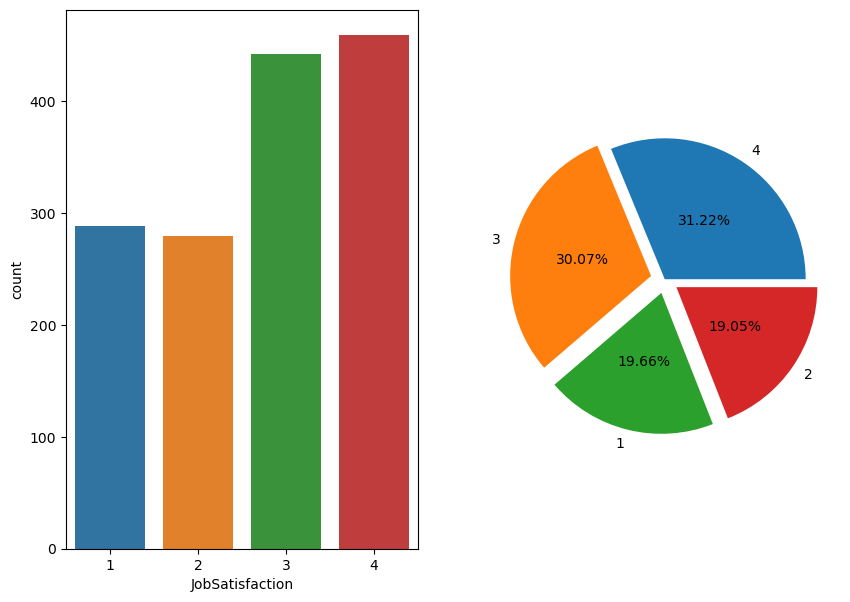

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (10, 7))
data = df["JobSatisfaction"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = df["JobSatisfaction"], ax = ax[0])
plt.pie(x = data, autopct = "%.2f%%", explode = [0, 0.1,0.1,0.1], labels = labels, pctdistance = 0.5) # pctdistance is the distance between the percentage
                                                                     # on pie chart from center.
                                                                     #  explode is to split the slices by the distance provided
                                                                     # autopct: is used to print the number on pie slices.  

plt.show()

In [33]:
info_of_cat("MaritalStatus")

Unique values in MaritalStatus are: ['Single' 'Married' nan 'Divorced']
Mode of MaritalStatus is Married
Number of missing values in MaritalStatus is 56


In [34]:
MaritalStatus_mode = df.MaritalStatus.mode()[0]
print(MaritalStatus_mode)
df["MaritalStatus"].fillna(MaritalStatus_mode, inplace = True)

Married


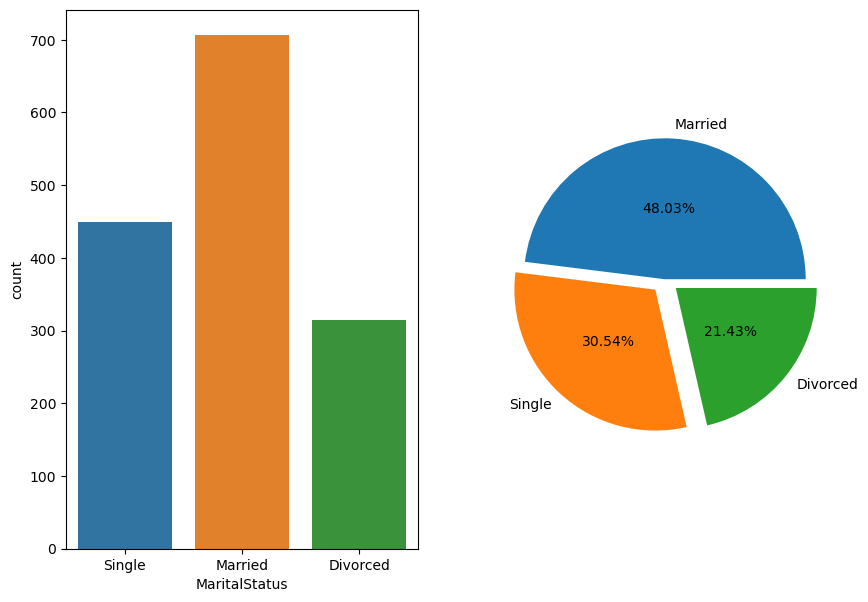

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (10, 7))
data = df["MaritalStatus"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = df["MaritalStatus"], ax = ax[0])
plt.pie(x = data, autopct = "%.2f%%", explode = [0, 0.1,0.1], labels = labels, pctdistance = 0.5) # pctdistance is the distance between the percentage
                                                                     # on pie chart from center.
                                                                     #  explode is to split the slices by the distance provided
                                                                     # autopct: is used to print the number on pie slices.  

plt.show()

In [36]:
info_of_cat("NumCompaniesWorked")

Unique values in NumCompaniesWorked are: [8 1 6 9 0 4 5 2 7 3]
Mode of NumCompaniesWorked is 1
Number of missing values in NumCompaniesWorked is 0


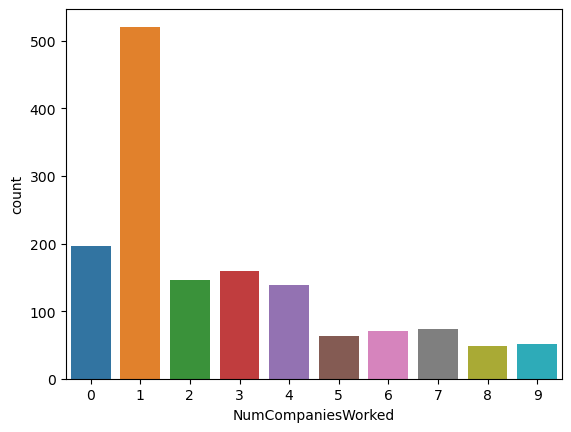

In [37]:
fig,figsize = (40, 10)
data = df["NumCompaniesWorked"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = df["NumCompaniesWorked"])
plt.show()

In [38]:
info_of_cat("Over18")

Unique values in Over18 are: ['Y' nan]
Mode of Over18 is Y
Number of missing values in Over18 is 54


In [39]:
df=df.drop(['Over18'],axis=1)

In [40]:
info_of_cat("OverTime")

Unique values in OverTime are: ['Yes' 'No']
Mode of OverTime is No
Number of missing values in OverTime is 0


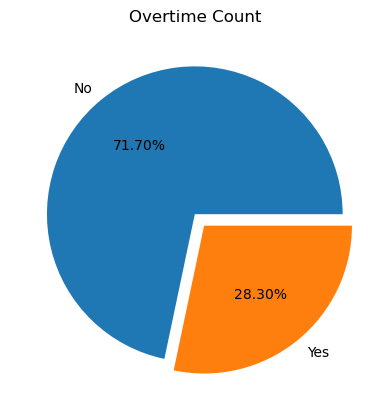

In [41]:
fig,figsize = (15, 7)
plt.title("Overtime Count")                  # Set the title of the graph
percentage = df["OverTime"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["OverTime"].value_counts().index) # Converting the index of value counts into list
plt.pie(percentage,labels = labels, autopct= "%0.2f%%",explode= [0,0.1])  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

In [42]:
info_of_cat("PerformanceRating")

Unique values in PerformanceRating are: [3 4]
Mode of PerformanceRating is 3
Number of missing values in PerformanceRating is 0


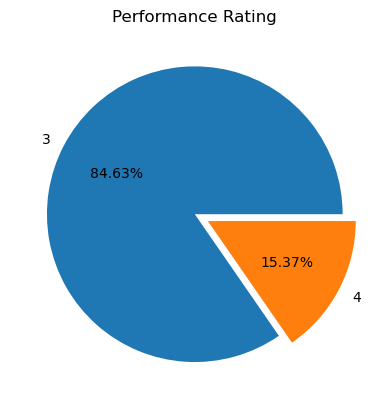

In [43]:
fig,figsize = (15, 7)
plt.title("Performance Rating")                  # Set the title of the graph
percentage = df["PerformanceRating"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["PerformanceRating"].value_counts().index) # Converting the index of value counts into list
plt.pie(percentage,labels = labels, autopct= "%0.2f%%",explode= [0,0.1])  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

In [44]:
info_of_cat("RelationshipSatisfaction")

Unique values in RelationshipSatisfaction are: [1 4 2 3]
Mode of RelationshipSatisfaction is 3
Number of missing values in RelationshipSatisfaction is 0


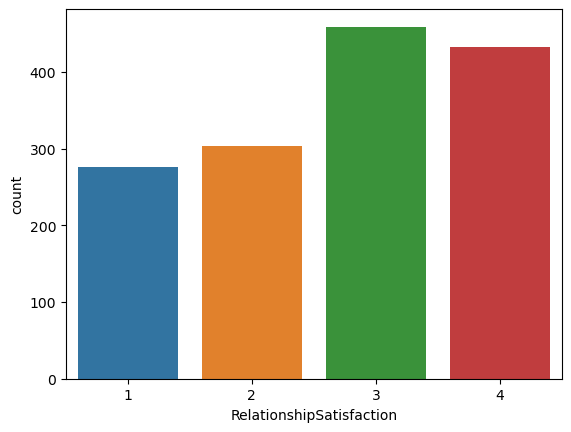

In [45]:
fig,figsize = (40, 10)
data = df["RelationshipSatisfaction"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = df["RelationshipSatisfaction"])
plt.show()

In [46]:
info_of_cat("TrainingTimesLastYear")

Unique values in TrainingTimesLastYear are: [0 3 2 5 1 4 6]
Mode of TrainingTimesLastYear is 2
Number of missing values in TrainingTimesLastYear is 0


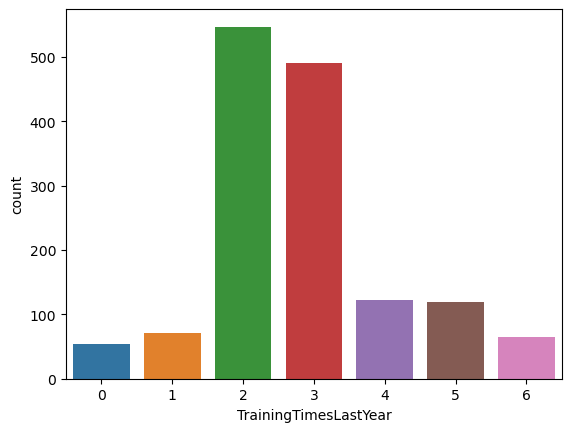

In [47]:
fig,figsize = (40, 10)
data = df["TrainingTimesLastYear"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = df["TrainingTimesLastYear"])
plt.show()

In [48]:
info_of_cat("WorkLifeBalance")

Unique values in WorkLifeBalance are: [1 3 2 4]
Mode of WorkLifeBalance is 3
Number of missing values in WorkLifeBalance is 0


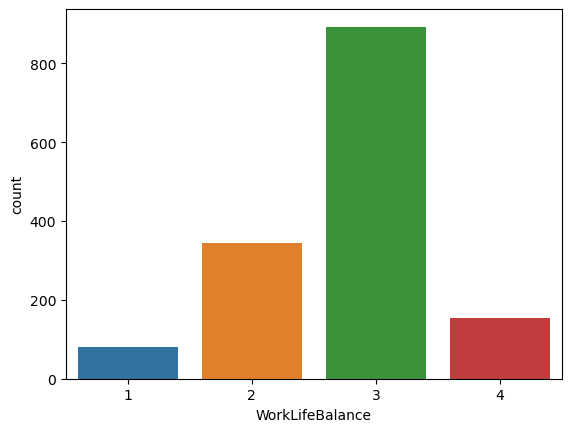

In [49]:
fig,figsize = (40, 10)
data = df["WorkLifeBalance"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = df["WorkLifeBalance"])
plt.show()

In [50]:
info_of_cat("YearsInCurrentRole")

Unique values in YearsInCurrentRole are: [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
Mode of YearsInCurrentRole is 2
Number of missing values in YearsInCurrentRole is 0


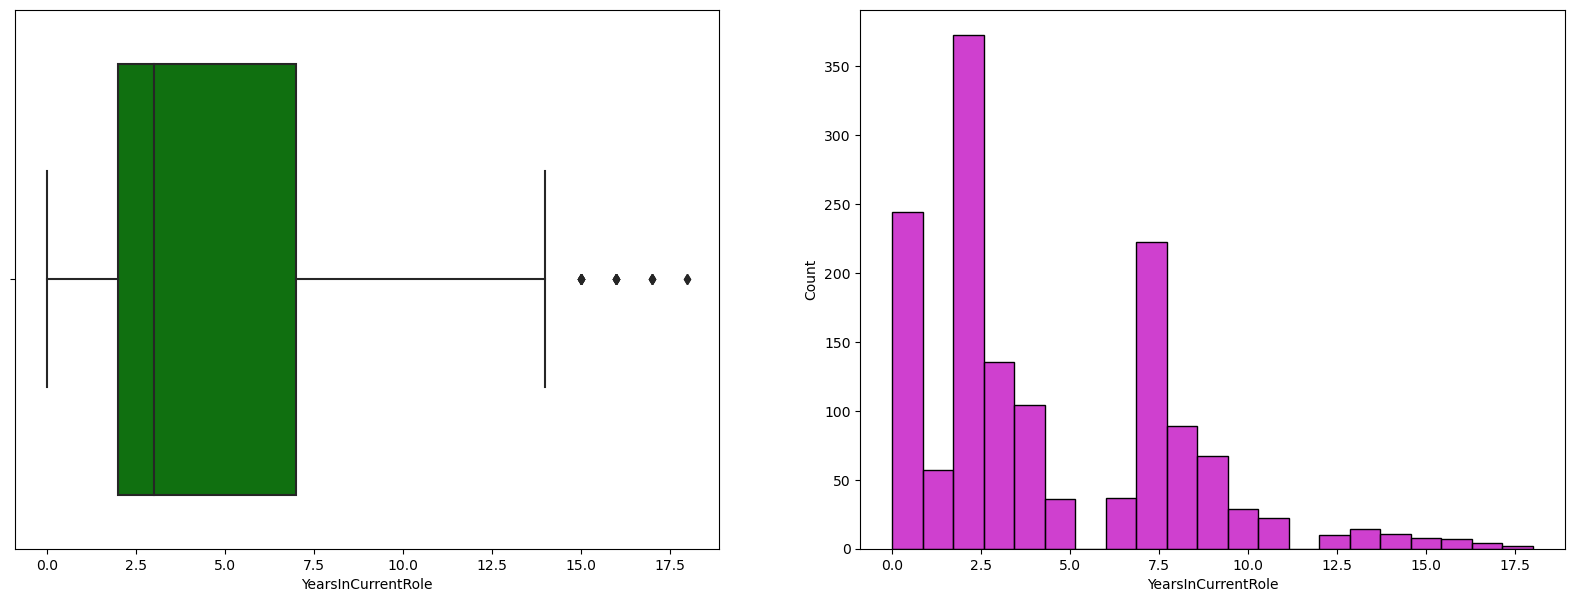

In [51]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["YearsInCurrentRole"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["YearsInCurrentRole"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

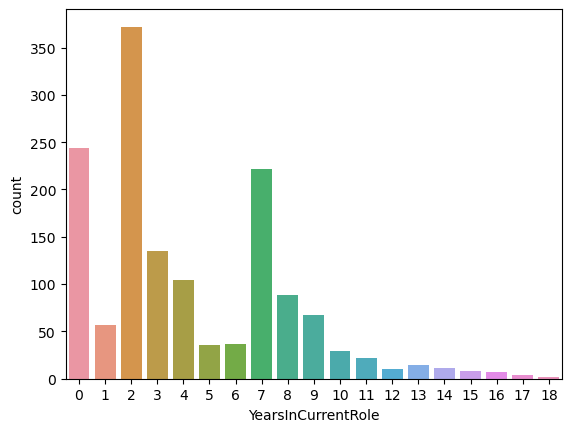

In [52]:
fig,figsize = (40, 10)
data = df["YearsInCurrentRole"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = df["YearsInCurrentRole"])
plt.show()

In [53]:
info_of_cat("YearsSinceLastPromotion")

Unique values in YearsSinceLastPromotion are: [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
Mode of YearsSinceLastPromotion is 0
Number of missing values in YearsSinceLastPromotion is 0


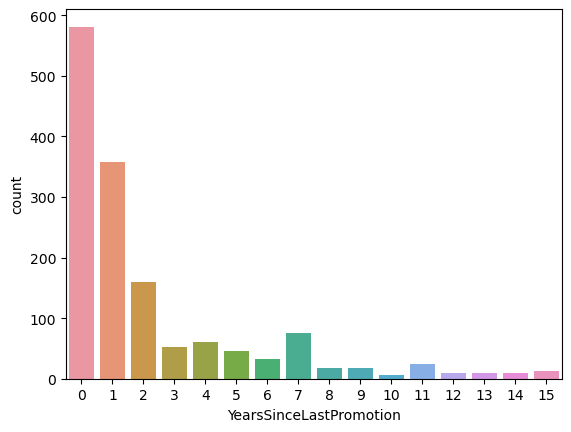

In [54]:
fig,figsize = (40, 10)
data = df["YearsSinceLastPromotion"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = df["YearsSinceLastPromotion"])
plt.show()

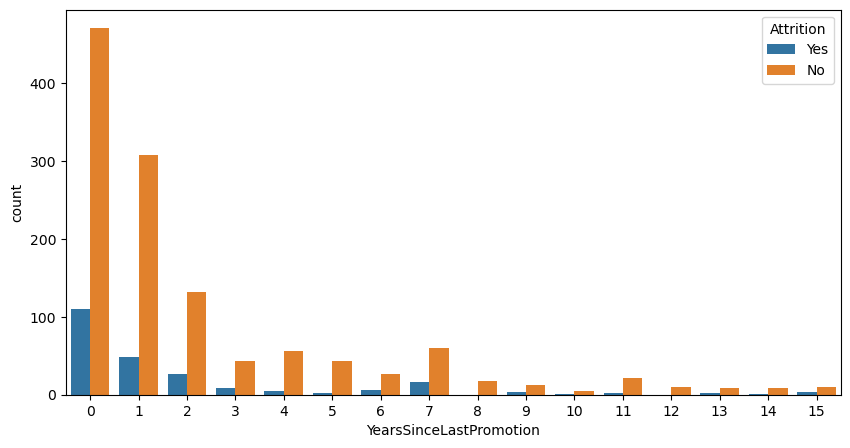

In [55]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(x = "YearsSinceLastPromotion", hue = "Attrition", data = df)
plt.show()

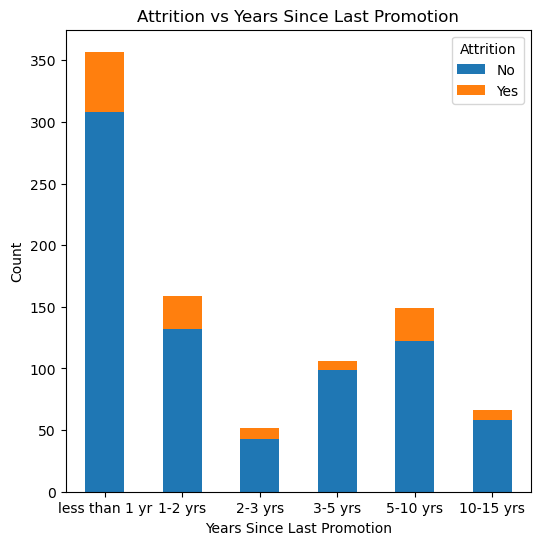

In [56]:
bins = [0, 1, 2, 3, 5,10,15]                                            
labels = ["less than 1 yr", "1-2 yrs", "2-3 yrs", "3-5 yrs", "5-10 yrs", "10-15 yrs"]                   
df["Years Since Last Promotion"] = pd.cut(df["YearsSinceLastPromotion"], bins=bins, labels=labels)

counts = df.groupby(["Years Since Last Promotion", "Attrition"]).size().unstack()

counts.plot(kind="bar", stacked=True, figsize=(6,6))
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Count")
plt.title("Attrition vs Years Since Last Promotion")
plt.legend(title="Attrition", loc="upper right")
plt.xticks(rotation=0)
plt.show()

### The interpretation of the chart depends on the data being used, but in general, it can show patterns of attrition related to years since last promotion. For example, it might show that employees who have been promoted more recently are less likely to experience attrition.

In [57]:
info_of_cat("YearsWithCurrManager")

Unique values in YearsWithCurrManager are: [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]
Mode of YearsWithCurrManager is 2
Number of missing values in YearsWithCurrManager is 0


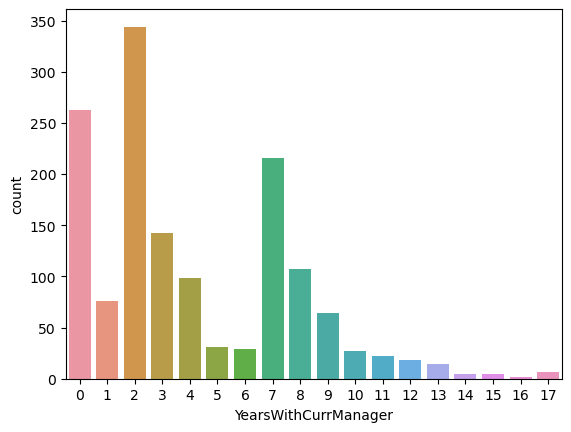

In [58]:
fig,figsize = (40, 10)
data = df["YearsWithCurrManager"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = df["YearsWithCurrManager"])
plt.show()

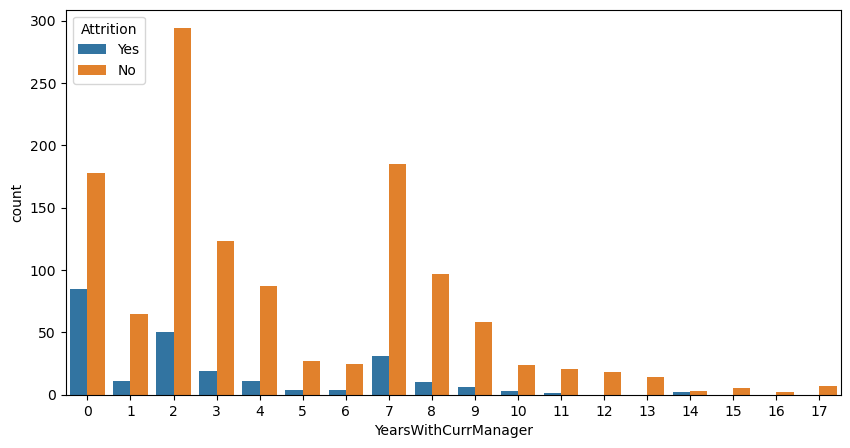

In [59]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(x = "YearsWithCurrManager", hue = "Attrition", data = df)
plt.show()

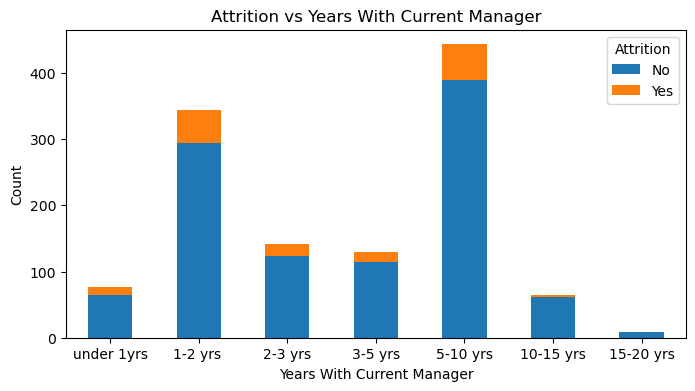

In [60]:
bins = [0, 1, 2, 3, 5,10,15,20]                                            
labels = ["under 1yrs", "1-2 yrs ", "2-3 yrs", "3-5 yrs","5-10 yrs","10-15 yrs","15-20 yrs"]                   
df["Years With Current Manager"] = pd.cut(df["YearsWithCurrManager"], bins=bins, labels=labels)

counts = df.groupby(["Years With Current Manager", "Attrition"]).size().unstack()

counts.plot(kind="bar", stacked=True, figsize=(8,4))
plt.xlabel("Years With Current Manager")
plt.ylabel("Count")
plt.title("Attrition vs Years With Current Manager")
plt.legend(title="Attrition", loc="upper right")
plt.xticks(rotation=0)
plt.show()

In [61]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [62]:
info_of_numerical("Age")

The mean of the Age is 36.93015214384509
The median of the Age is 36.0
The mode of the Age is 34.0
The standard deviation of the Age is 9.16220404447615
Number of missing values in the Age is 24


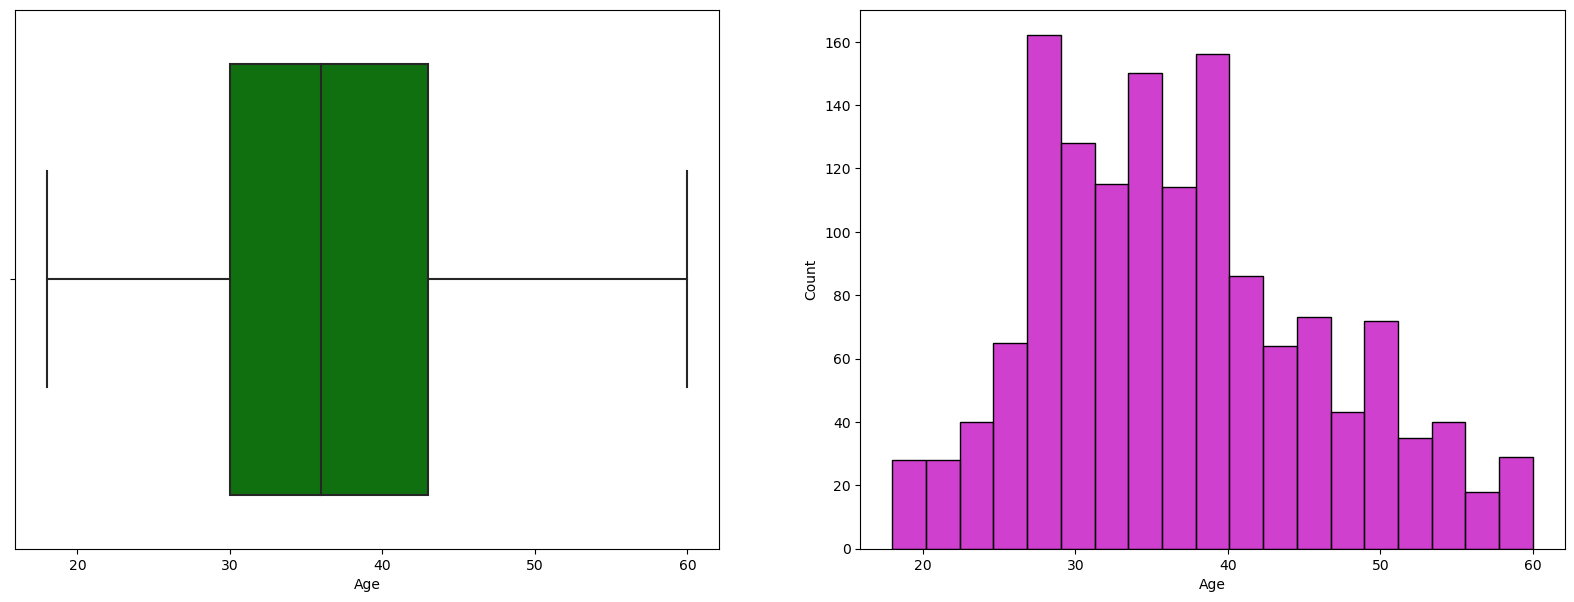

In [63]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Age"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Age"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()


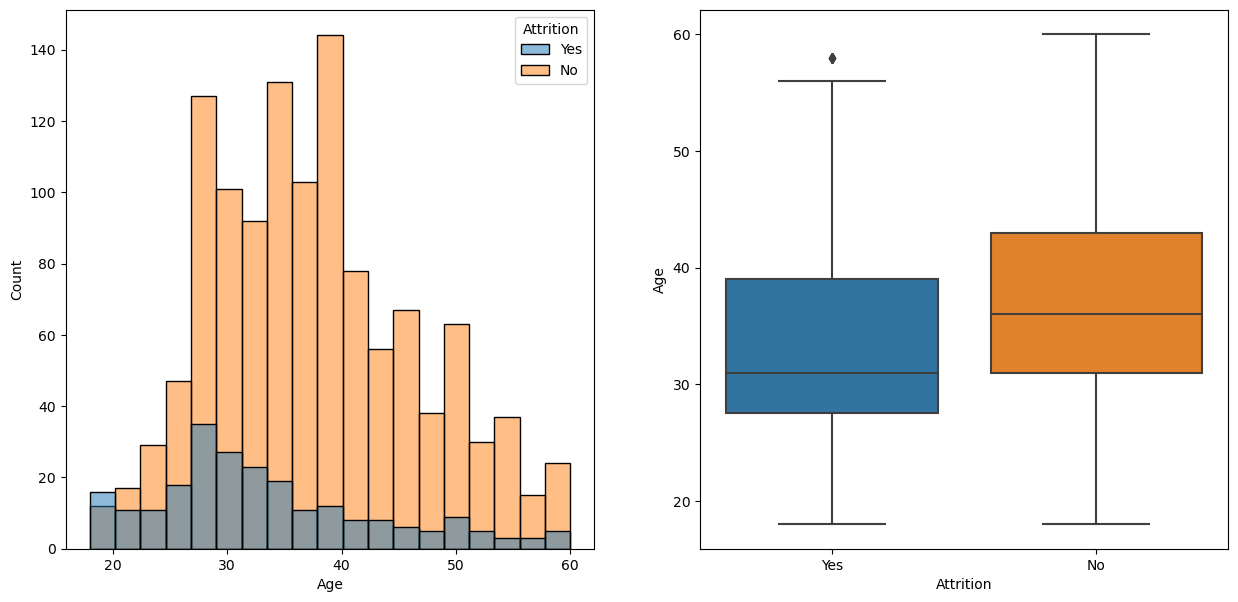

In [64]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["Age"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(y = df["Age"], x = df["Attrition"], ax = ax[1])
plt.show()

## Interpretation : - we can see that the distribution of ages is skewed towards the younger age group for employees who left the company (blue) compared to those who stayed (orange).

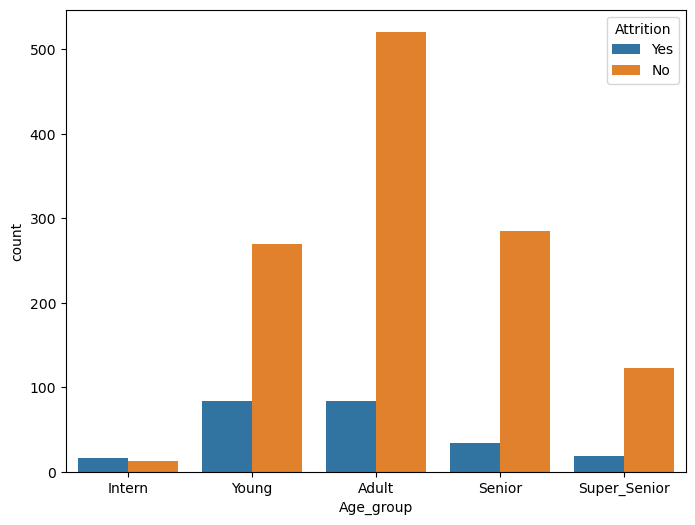

In [65]:
bins = [0, 20, 30, 40, 50, 60]                                            
labels = ["Intern", "Young", "Adult", "Senior", "Super_Senior"]                   
df["Age_group"] = pd.cut(df["Age"], bins=bins, labels=labels)

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Age_group", hue="Attrition", data=df)
plt.show()


## From the graph, it can be observed that the highest number of employees who left the company were in the adult age group (between 30-40 years old), followed by the young age group (less than 20 years old). On the other hand, the highest number of employees who stayed in the company were in the senior age group (between 40-50 years old), followed by the adult age group.

This information could be useful for the HR department to focus on retention strategies for the young and adult age groups to reduce the attrition rate.

In [66]:
info_of_numerical("DistanceFromHome")

The mean of the DistanceFromHome is 9.19251700680272
The median of the DistanceFromHome is 7.0
The mode of the DistanceFromHome is 2
The standard deviation of the DistanceFromHome is 8.106864435666084
Number of missing values in the DistanceFromHome is 0


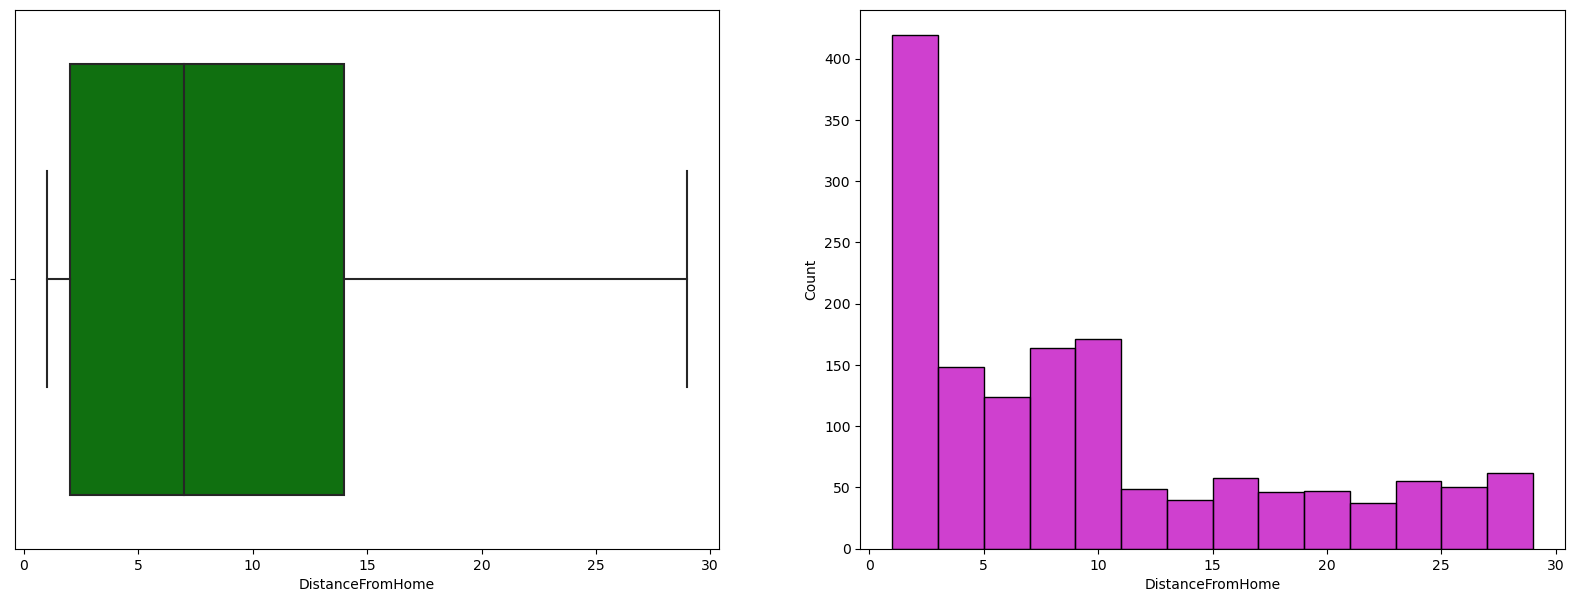

In [67]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["DistanceFromHome"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["DistanceFromHome"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

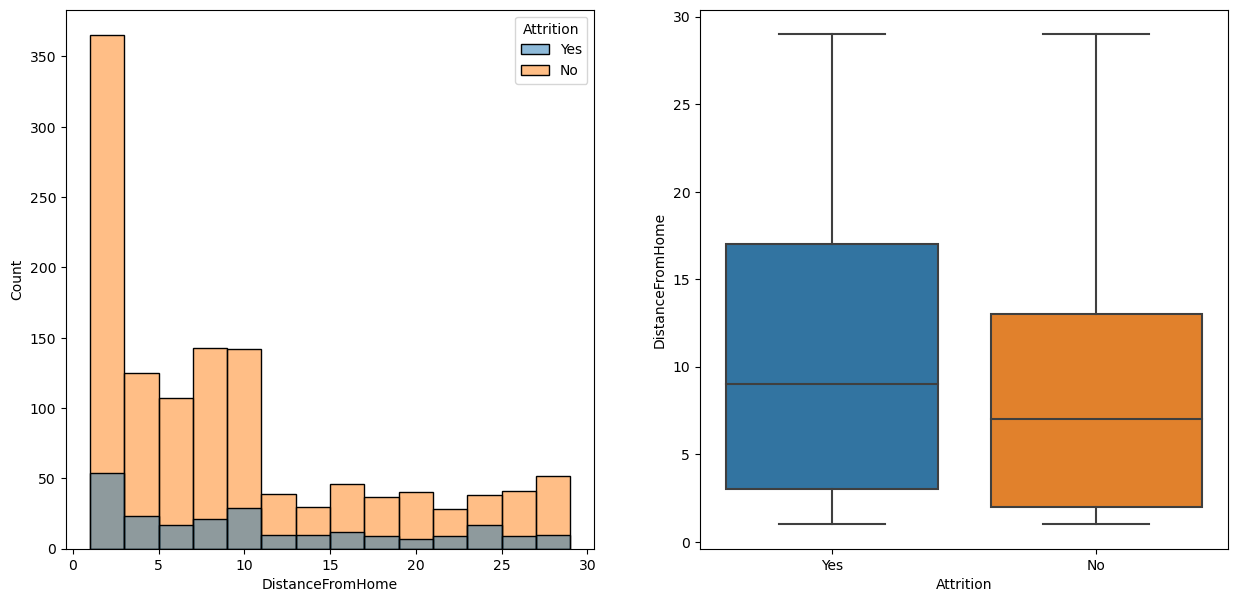

In [68]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["DistanceFromHome"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(y = df["DistanceFromHome"], x = df["Attrition"], ax = ax[1])
plt.show()

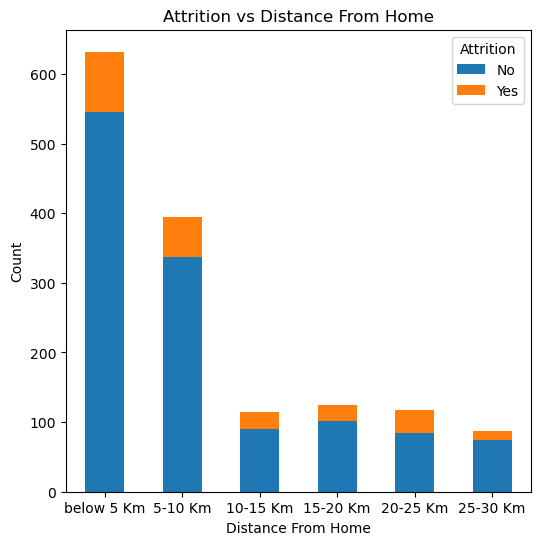

In [69]:
bins = [0, 5, 10,15, 20,25, 30]                                            
labels = ["below 5 Km", "5-10 Km", "10-15 Km", "15-20 Km", "20-25 Km", "25-30 Km"]                   
df["Distance From Home"] = pd.cut(df["DistanceFromHome"], bins=bins, labels=labels)

counts = df.groupby(["Distance From Home", "Attrition"]).size().unstack()

counts.plot(kind="bar", stacked=True, figsize=(6,6))
plt.xlabel("Distance From Home")
plt.ylabel("Count")
plt.title("Attrition vs Distance From Home")
plt.legend(title="Attrition", loc="upper right")
plt.xticks(rotation=0)
plt.show()


#### The interpretation of the graph is that it shows the relationship between attrition and the distance of employees' homes from their workplace. The graph helps to identify whether there is a pattern between the distance of employees' homes from their workplace and their attrition status. For example, the graph may indicate that employees who live far from their workplace are more likely to leave the company. Alternatively, it may show that employees who live closer to work have higher attrition rates. By analyzing the graph, companies can gain insights into how distance impacts employee satisfaction and retention, and take steps to improve their employee experience accordingly.

In [70]:
info_of_numerical("EmployeeNumber")

The mean of the EmployeeNumber is 1024.865306122449
The median of the EmployeeNumber is 1020.5
The mode of the EmployeeNumber is 1
The standard deviation of the EmployeeNumber is 602.024334847475
Number of missing values in the EmployeeNumber is 0


In [71]:
df=df.drop(['EmployeeNumber'],axis=1)

In [72]:
info_of_numerical("HourlyRate")

The mean of the HourlyRate is 65.89115646258503
The median of the HourlyRate is 66.0
The mode of the HourlyRate is 66
The standard deviation of the HourlyRate is 20.329427593996158
Number of missing values in the HourlyRate is 0


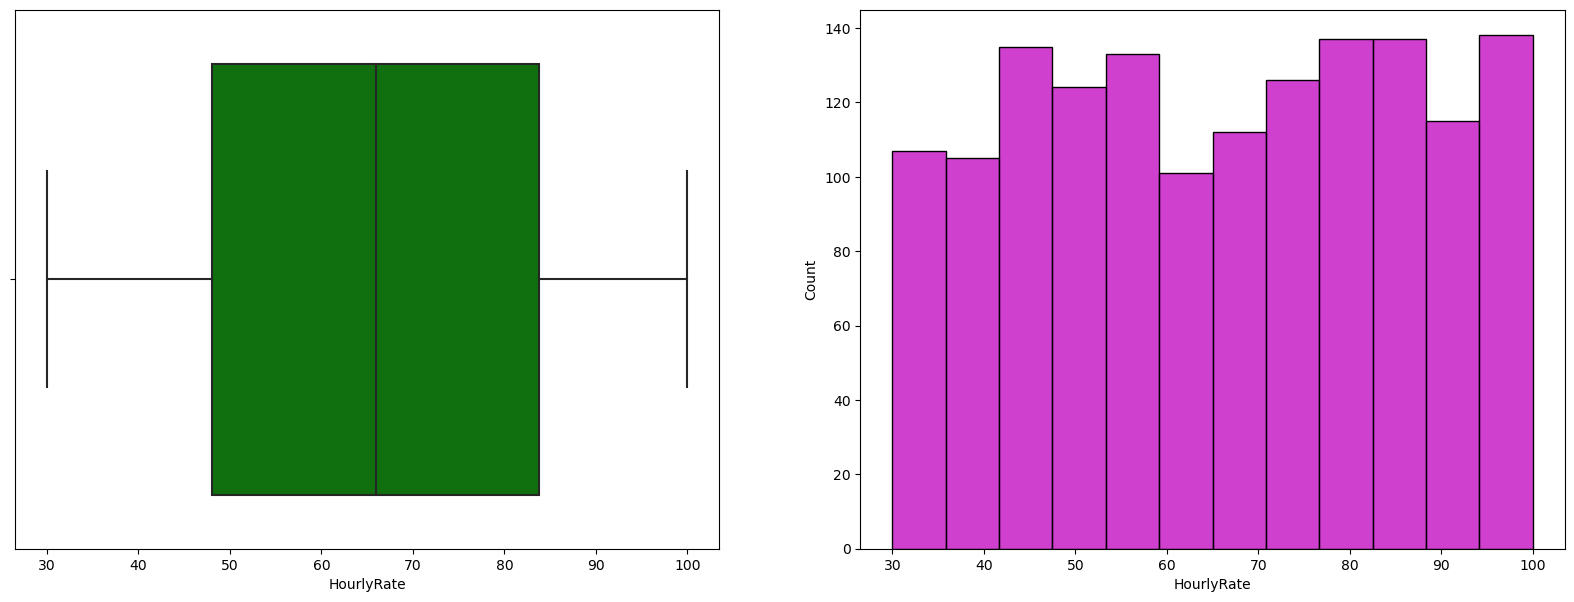

In [73]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["HourlyRate"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["HourlyRate"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [74]:
info_of_numerical("MonthlyIncome")

The mean of the MonthlyIncome is 6502.931292517007
The median of the MonthlyIncome is 4919.0
The mode of the MonthlyIncome is 2342
The standard deviation of the MonthlyIncome is 4707.956783097995
Number of missing values in the MonthlyIncome is 0


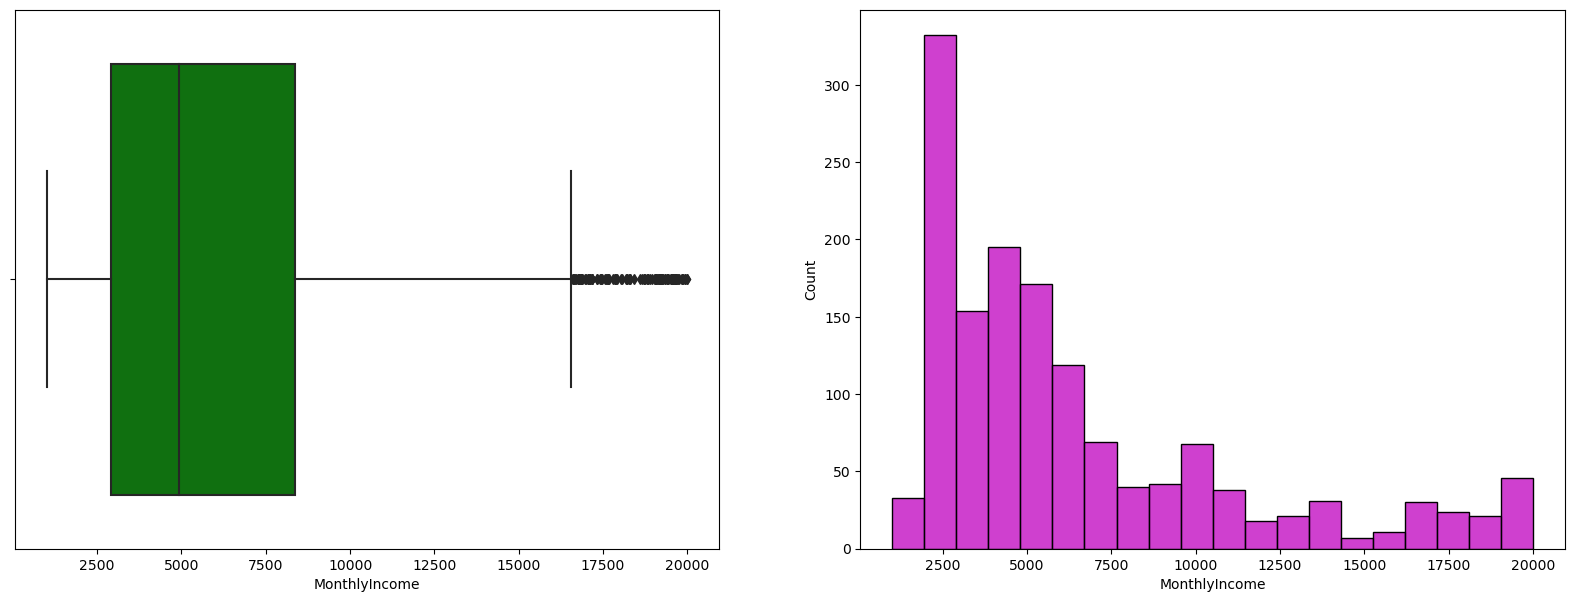

In [75]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["MonthlyIncome"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["MonthlyIncome"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

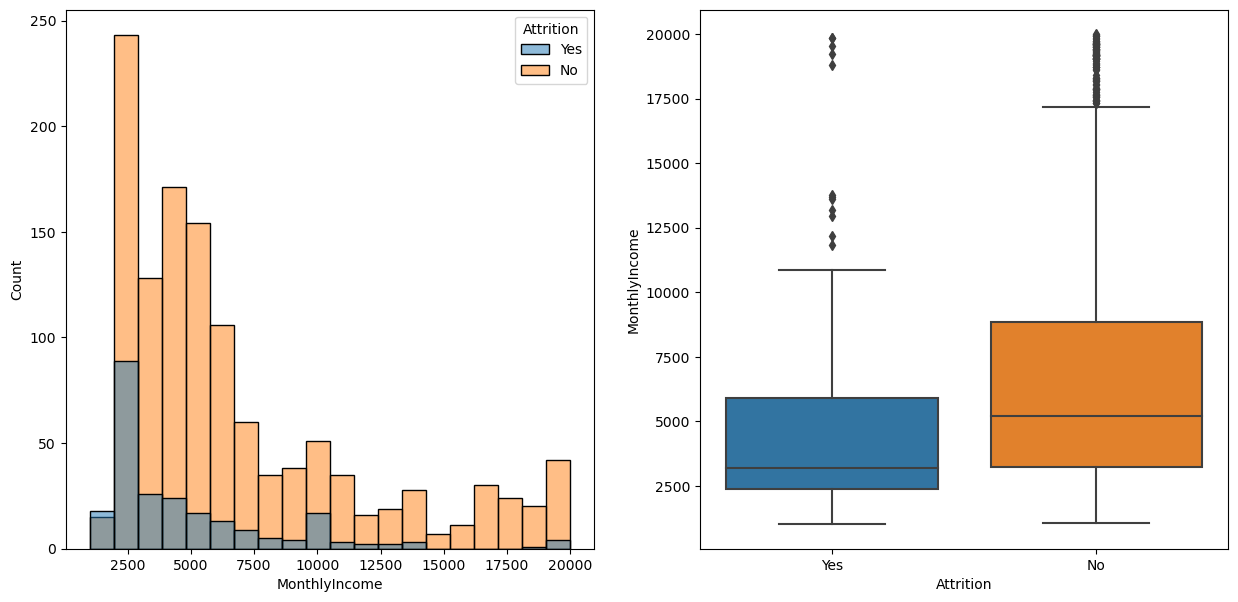

In [76]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["MonthlyIncome"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(y = df["MonthlyIncome"], x = df["Attrition"], ax = ax[1])
plt.show()

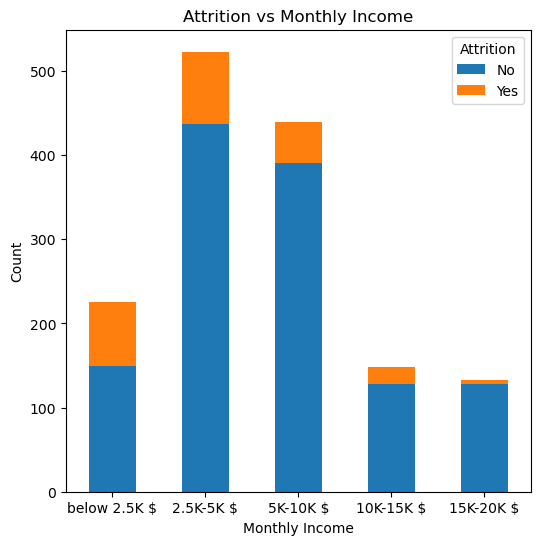

In [77]:
bins = [0, 2500, 5000, 10000, 15000,20000]                                            
labels = ["below 2.5K $", "2.5K-5K $", "5K-10K $", "10K-15K $","15K-20K $"]                   
df["Monthly Income"] = pd.cut(df["MonthlyIncome"], bins=bins, labels=labels)

counts = df.groupby(["Monthly Income", "Attrition"]).size().unstack()

counts.plot(kind="bar", stacked=True, figsize=(6,6))
plt.xlabel("Monthly Income")
plt.ylabel("Count")
plt.title("Attrition vs Monthly Income")
plt.legend(title="Attrition", loc="upper right")
plt.xticks(rotation=0)
plt.show()

### The graph indicates the distribution of employees based on their monthly income range and provides insights into how attrition varies across these groups. It can be used to analyze whether employees with higher or lower monthly income are more likely to leave the company. The graph can also be used to identify income ranges where the attrition rate is higher and to take corrective measures accordingly.

In [78]:
info_of_numerical("TotalWorkingYears")

The mean of the TotalWorkingYears is 11.279591836734694
The median of the TotalWorkingYears is 10.0
The mode of the TotalWorkingYears is 10
The standard deviation of the TotalWorkingYears is 7.780781675515004
Number of missing values in the TotalWorkingYears is 0


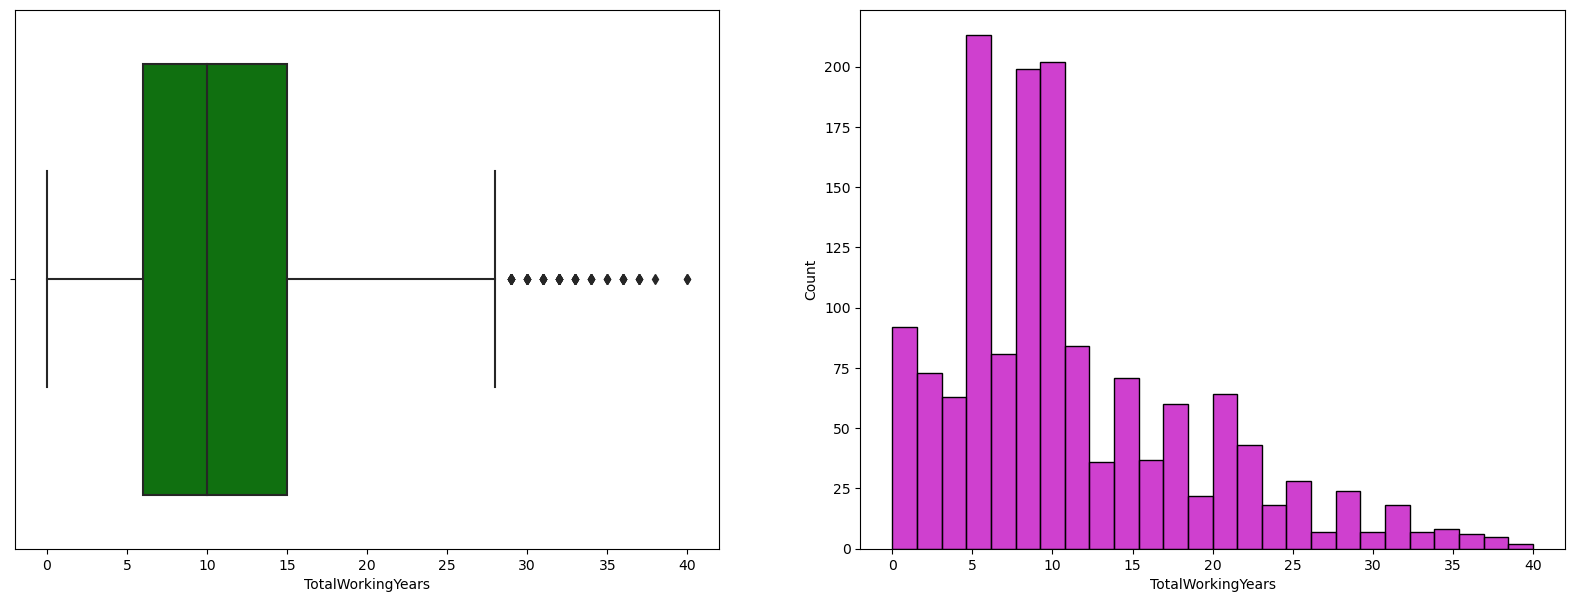

In [79]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["TotalWorkingYears"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["TotalWorkingYears"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

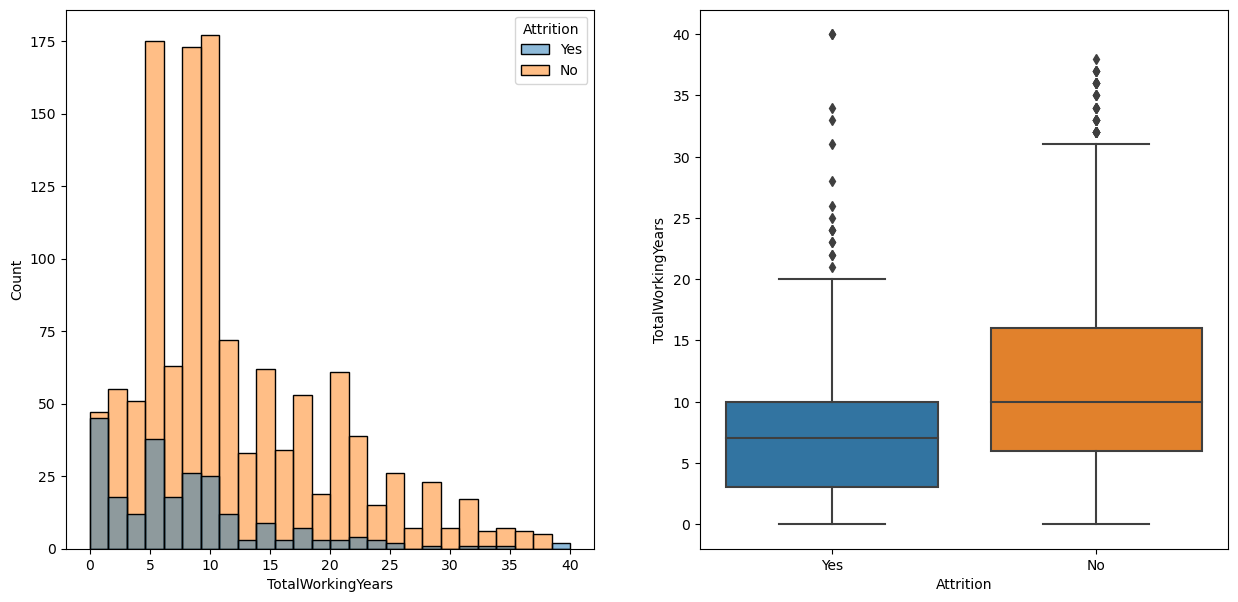

In [80]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["TotalWorkingYears"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(y = df["TotalWorkingYears"], x = df["Attrition"], ax = ax[1])
plt.show()

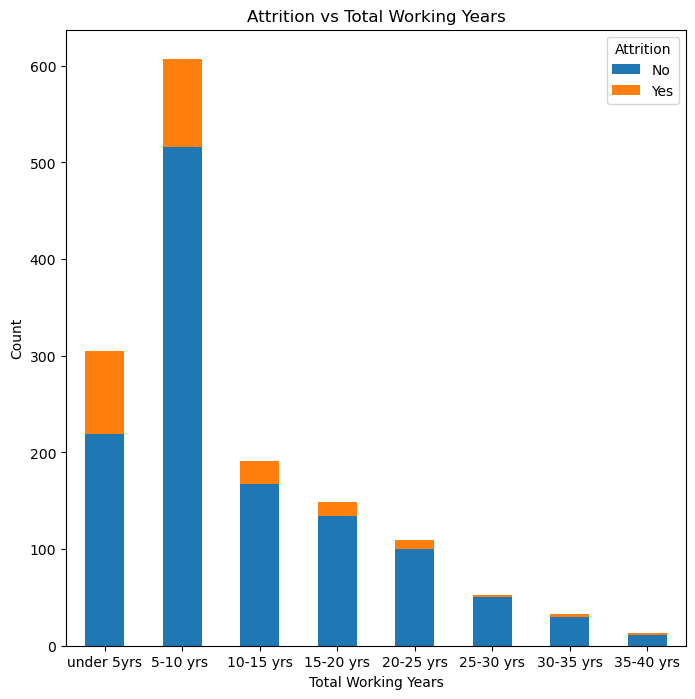

In [81]:
bins = [0, 5, 10, 15, 20,25,30,35,40]                                            
labels = ["under 5yrs", "5-10 yrs ", "10-15 yrs", "15-20 yrs","20-25 yrs","25-30 yrs","30-35 yrs","35-40 yrs"]                   
df["Total Working Years"] = pd.cut(df["TotalWorkingYears"], bins=bins, labels=labels)

counts = df.groupby(["Total Working Years", "Attrition"]).size().unstack()

counts.plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel("Total Working Years")
plt.ylabel("Count")
plt.title("Attrition vs Total Working Years")
plt.legend(title="Attrition", loc="upper right")
plt.xticks(rotation=0)
plt.show()

In [82]:
info_of_numerical("YearsAtCompany")

The mean of the YearsAtCompany is 7.0081632653061225
The median of the YearsAtCompany is 5.0
The mode of the YearsAtCompany is 5
The standard deviation of the YearsAtCompany is 6.126525152403566
Number of missing values in the YearsAtCompany is 0


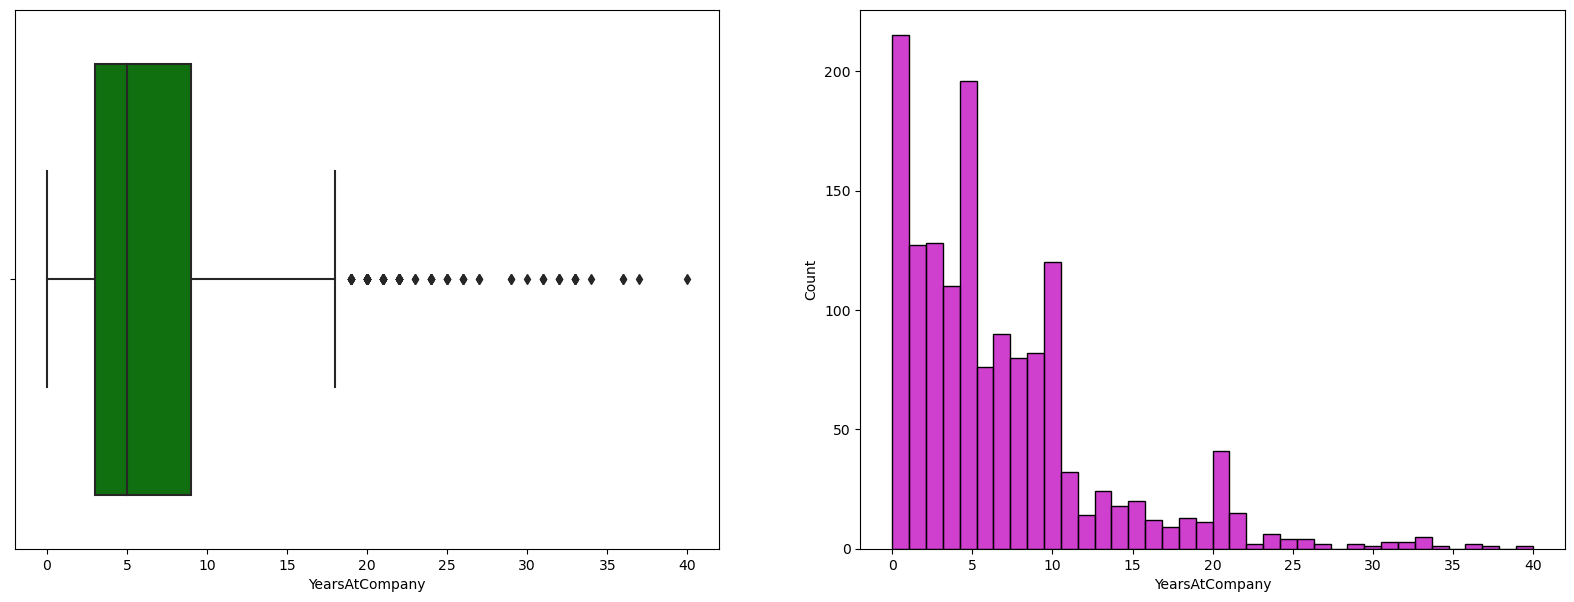

In [83]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["YearsAtCompany"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["YearsAtCompany"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

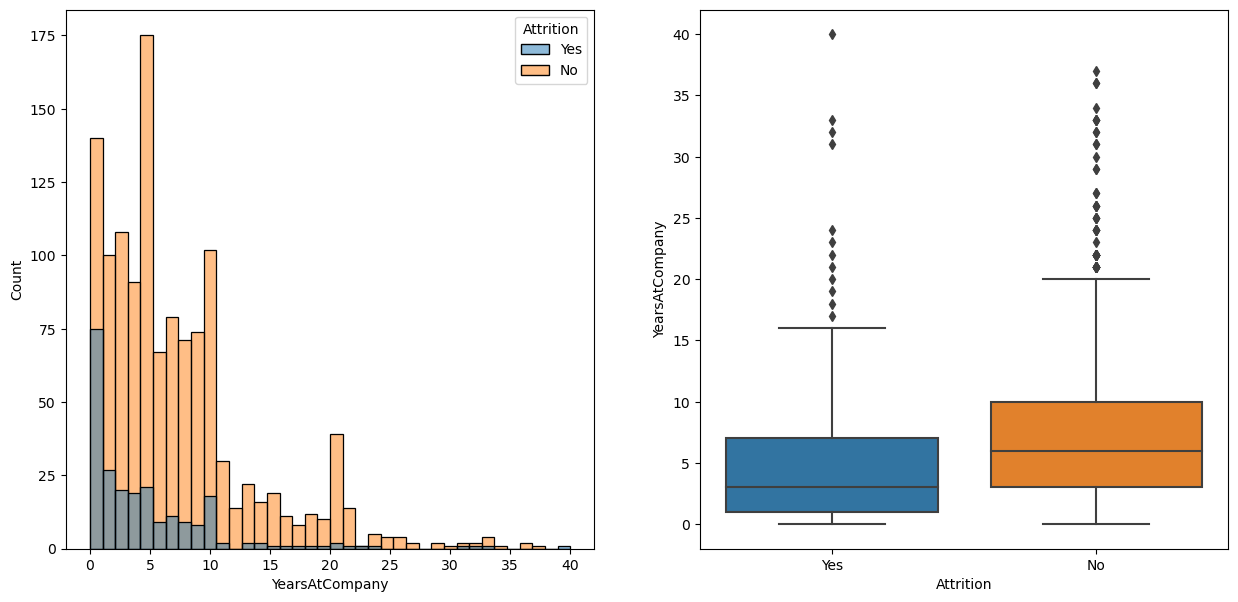

In [84]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["YearsAtCompany"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(y = df["YearsAtCompany"], x = df["Attrition"], ax = ax[1])
plt.show()

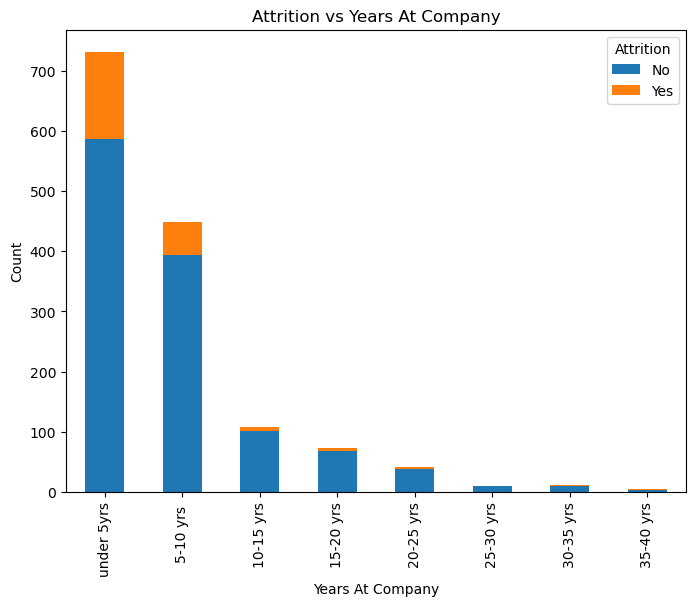

In [85]:
bins = [0, 5, 10, 15, 20,25,30,35,40]                                            
labels = ["under 5yrs", "5-10 yrs ", "10-15 yrs", "15-20 yrs","20-25 yrs","25-30 yrs","30-35 yrs","35-40 yrs"]                   
df["Years At Company"] = pd.cut(df["YearsAtCompany"], bins=bins, labels=labels)

counts = df.groupby(["Years At Company", "Attrition"]).size().unstack()

counts.plot(kind="bar", stacked=True, figsize=(8,6))
plt.xlabel("Years At Company")
plt.ylabel("Count")
plt.title("Attrition vs Years At Company")
plt.legend(title="Attrition", loc="upper right")
plt.show()

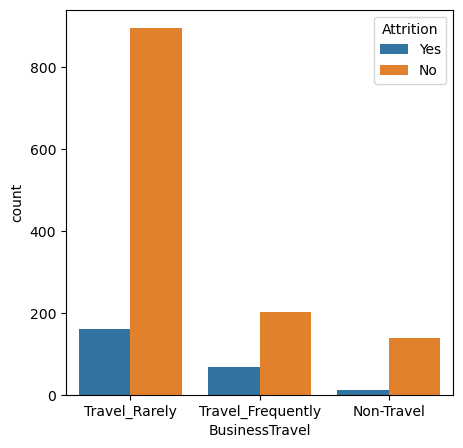

In [86]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = "BusinessTravel", hue = "Attrition", data = df)
plt.show()

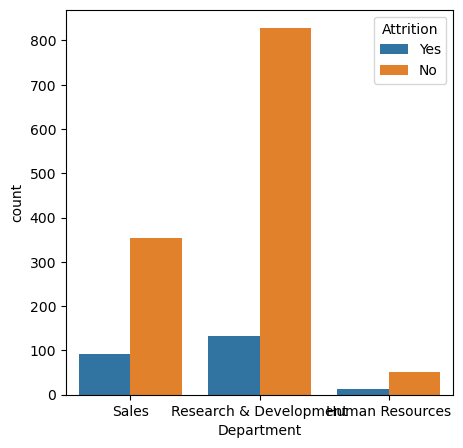

In [87]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = "Department", hue = "Attrition", data = df)
plt.show()

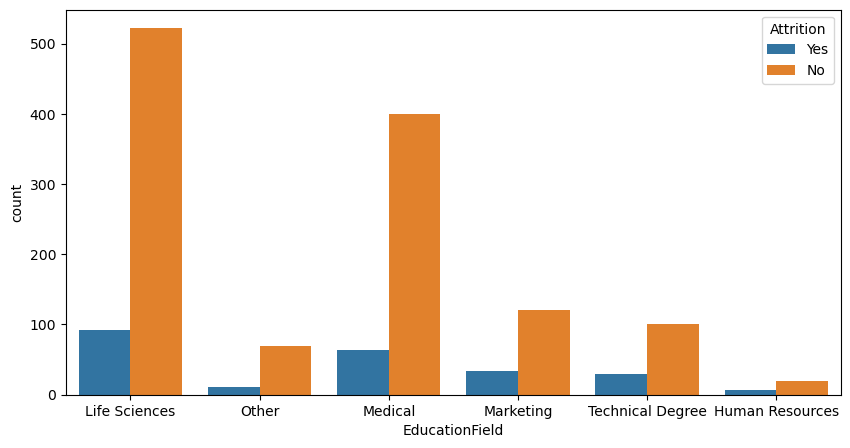

In [88]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(x = "EducationField", hue = "Attrition", data = df)
plt.show()

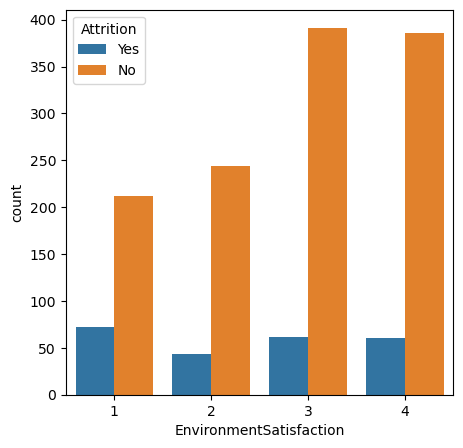

In [89]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = "EnvironmentSatisfaction", hue = "Attrition", data = df)
plt.show()

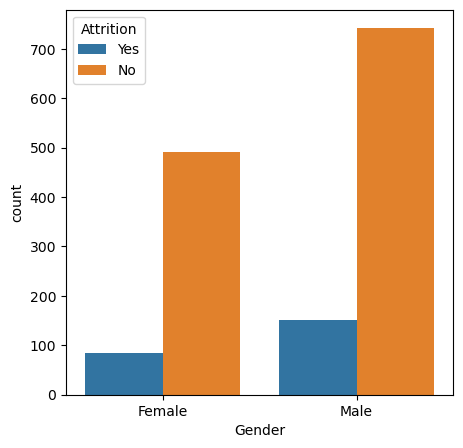

In [90]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = "Gender", hue = "Attrition", data = df)
plt.show()

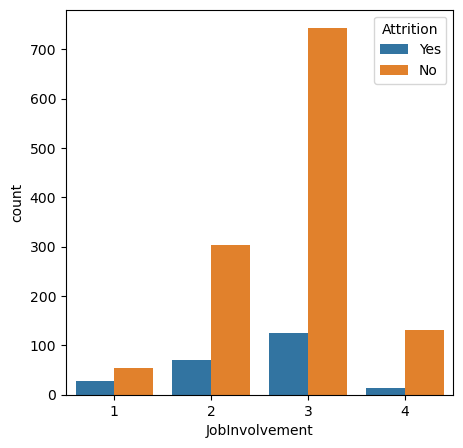

In [91]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = "JobInvolvement", hue = "Attrition", data = df)
plt.show()

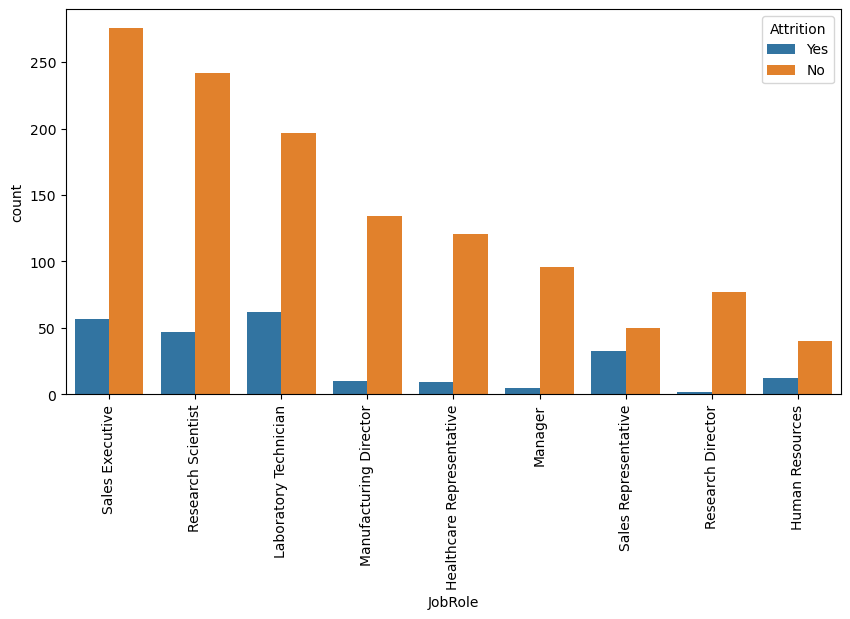

In [92]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(x = "JobRole", hue = "Attrition", data = df)
plt.xticks(rotation=90)
plt.show()

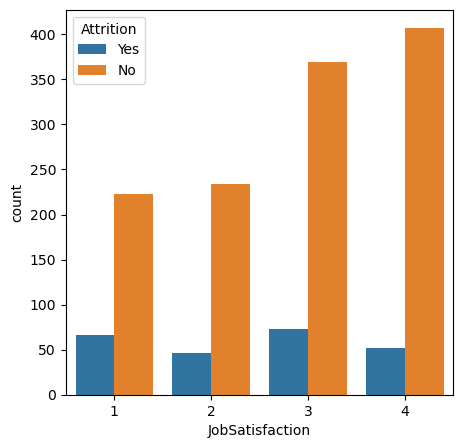

In [93]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = "JobSatisfaction", hue = "Attrition", data = df)
plt.show()

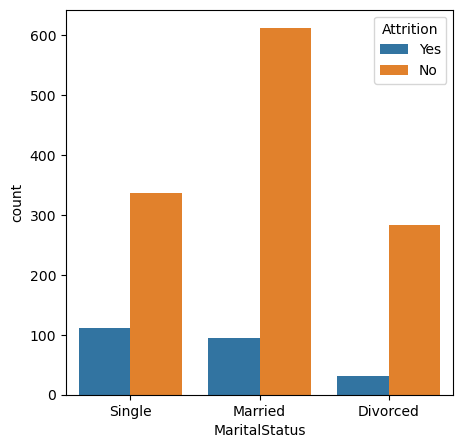

In [94]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = "MaritalStatus", hue = "Attrition", data = df)
plt.show()

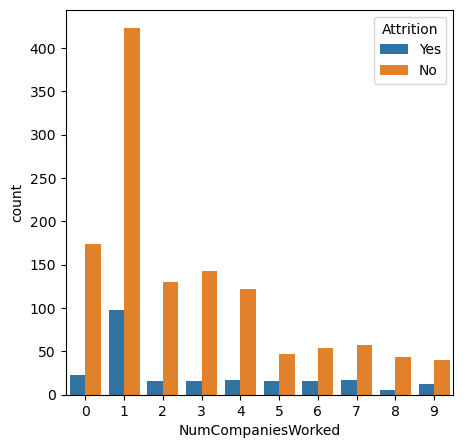

In [95]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = "NumCompaniesWorked", hue = "Attrition", data = df)
plt.show()

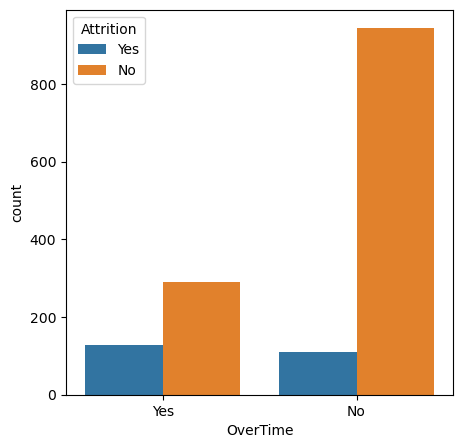

In [96]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = "OverTime", hue = "Attrition", data = df)
plt.show()

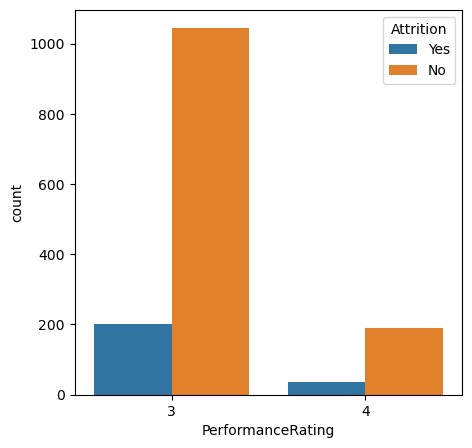

In [97]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = "PerformanceRating", hue = "Attrition", data = df)
plt.show()

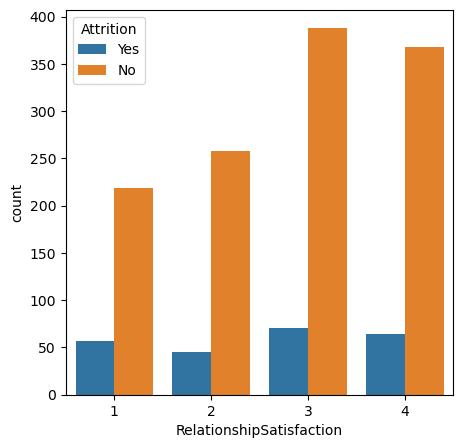

In [98]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = "RelationshipSatisfaction", hue = "Attrition", data = df)
plt.show()

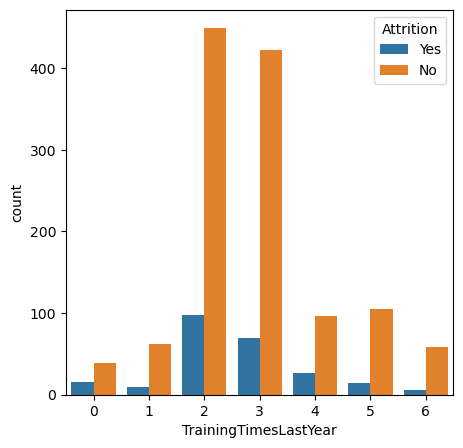

In [99]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = "TrainingTimesLastYear", hue = "Attrition", data = df)
plt.show()

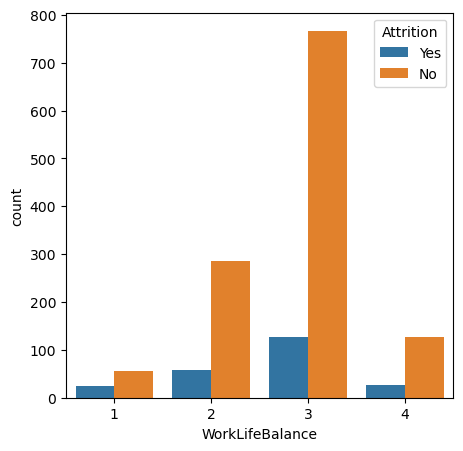

In [100]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = "WorkLifeBalance", hue = "Attrition", data = df)
plt.show()

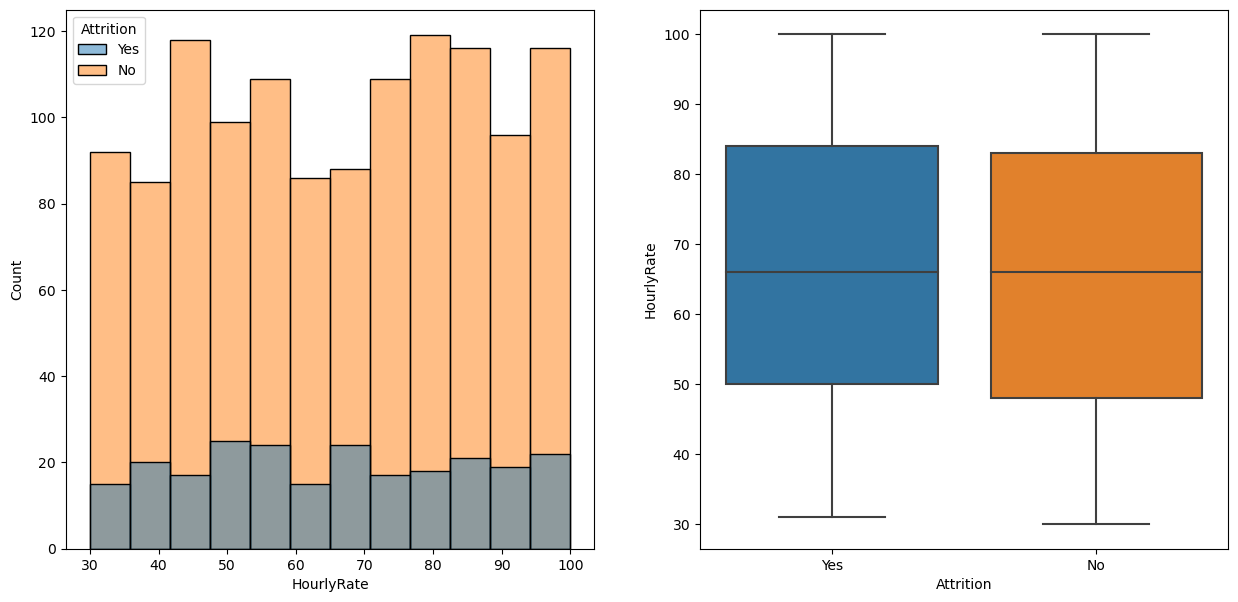

In [101]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["HourlyRate"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(y = df["HourlyRate"], x = df["Attrition"], ax = ax[1])
plt.show()